### Data fields

* ID - an ID for this instance
* Date - year-month-day
* Hour - Hour of he day
* Temperature - Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)
* y - Rented Bike count (Target), Count of bikes rented at each hour

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#---------- configs
pd.set_option('max_rows',100)
pd.set_option('max_columns',40)

### loading data

In [3]:
df = pd.read_csv(r"E:\DataSets\iti\Seol Bike Rental\train.csv",index_col=0,parse_dates=['Date'],dayfirst=True)
df = df.rename(columns={'Temperature(�C)':'Temperature(C)','Dew point temperature(�C)'  : 'Dew point temperature(C)'})
df.head(10)

,Date,y,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
ID,,,,,,,,,,,,,,
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,2017-12-01,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,2017-12-01,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,2017-12-01,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,2017-12-01,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df['Date'].dt.month.head(4000)

ID
0       12
1       12
2       12
3       12
4       12
        ..
3995     8
3996     8
3997     8
3998     8
3999     8
Name: Date, Length: 4000, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 5759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      5760 non-null   datetime64[ns]
 1   y                         5760 non-null   int64         
 2   Hour                      5760 non-null   int64         
 3   Temperature(C)            5760 non-null   float64       
 4   Humidity(%)               5760 non-null   int64         
 5   Wind speed (m/s)          5760 non-null   float64       
 6   Visibility (10m)          5760 non-null   int64         
 7   Dew point temperature(C)  5760 non-null   float64       
 8   Solar Radiation (MJ/m2)   5760 non-null   float64       
 9   Rainfall(mm)              5760 non-null   float64       
 10  Snowfall (cm)             5760 non-null   float64       
 11  Seasons                   5760 non-null   object        
 12  Holiday             

In [6]:
## nulls ?
df.isnull().sum().sum()

0

#### Fortunately with no nulls at all! and we have 5760 records , 14 columns .. .
* 4 categorical variables [Functioning Day ,Holiday ,Seasons and Date] and the rest 10 are numerical.

### Problem Statement :
* You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

<hr style="border:2px solid gray"> </hr>

## Univariate Exploration
* we will explore the distribution of each variable either by :
    - histogram for numerical variables 
    - count plot for categorical variables

In [7]:
df.columns

Index(['Date', 'y', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
numerical_only = ['Temperature(C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

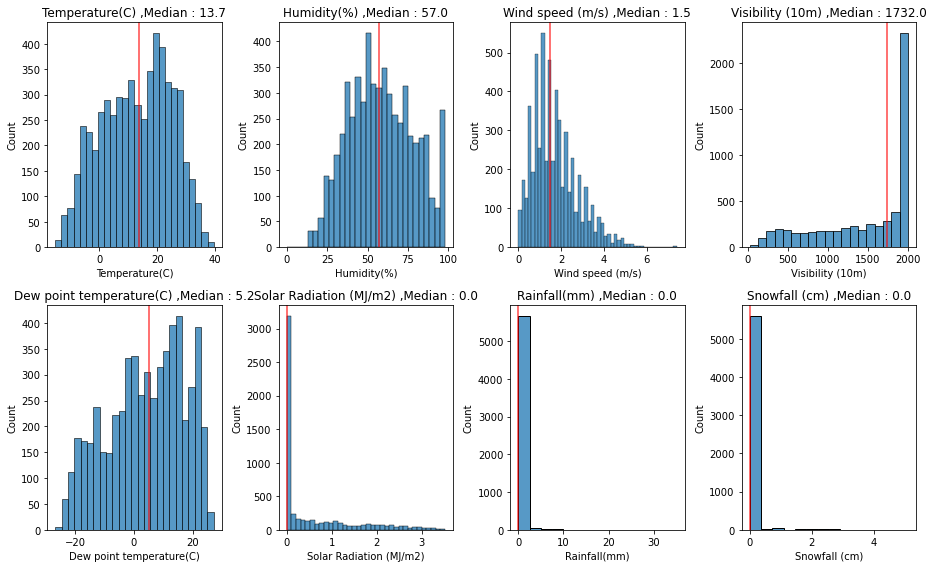

In [9]:
fig,axes = plt.subplots(2,4,figsize=(13,8))
for i,axe in enumerate(axes.flatten()):
    sns.histplot(df[numerical_only[i]],ax=axe)
    median = df[numerical_only[i]].median()
    axe.set_title(numerical_only[i] + f' ,Median : {median:0.1f}')
    axe.axvline(median, color ='red',lw=2, alpha = 0.55)
plt.tight_layout()
plt.show()

### check for outliers

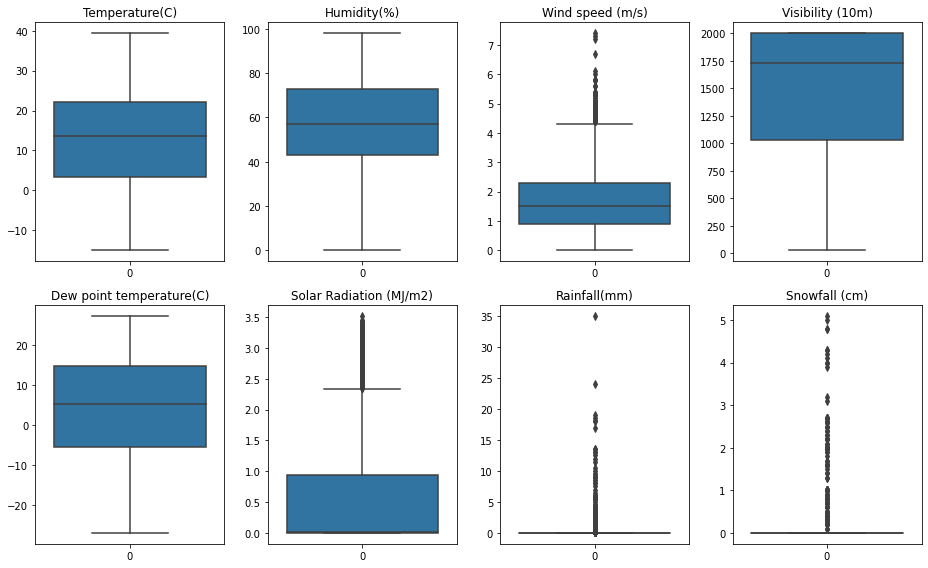

In [10]:
fig,axes = plt.subplots(2,4,figsize=(13,8))
for i,axe in enumerate(axes.flatten()):
    sns.boxplot(data=df[numerical_only[i]],ax=axe)
    axe.set_title(numerical_only[i])
    
plt.tight_layout()
plt.show()

- For the **[Rainfall & Snowfall]** it's considering mostly all the values are outliers but maybe because they are rare events in the during the year and they can be of major benefit linked to the our prediction.

- For **[Windspeed & Solar radiation]** we need to check the rare occurence of high windspeed (>4) & high solar radiation(>2.4) and visualize their link to our predictions.

* for example it could be snowing raining only in specific month in winter ,,, same for solar radiation & summer but this require further investigations.


## bivariate exploration 
* Exploring each categorical variable and their relation to the target y variable (rented bikes per hour).

#### First i will explore the target of prediction the count of bikes rented per hour

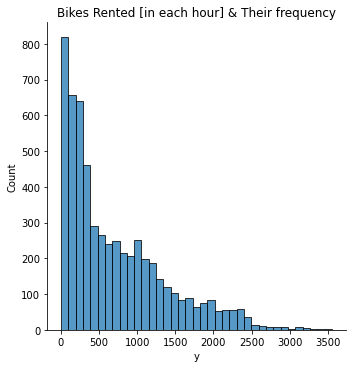

In [11]:
sns.displot(data=df['y'])
plt.title("Bikes Rented [in each hour] & Their frequency")
plt.show()

### lets see that for a random selection of days to understand the cycle

In [12]:
df[df['Date'] == '2018-4-11']

,Date,y,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
ID,,,,,,,,,,,,,,
2160,2018-04-11,0,0,14.4,82,4.6,1041,11.3,0.00,0.0,0.0,Spring,No Holiday,No
2161,2018-04-11,0,1,13.6,81,3.6,886,10.3,0.00,0.0,0.0,Spring,No Holiday,No
2162,2018-04-11,0,2,12.7,80,3.9,885,9.3,0.00,0.0,0.0,Spring,No Holiday,No
2163,2018-04-11,0,3,11.6,81,3.1,687,8.4,0.00,0.0,0.0,Spring,No Holiday,No
2164,2018-04-11,0,4,10.2,83,3.5,554,7.4,0.00,0.0,0.0,Spring,No Holiday,No
2165,2018-04-11,0,5,9.7,84,1.7,447,7.1,0.00,0.0,0.0,Spring,No Holiday,No
2166,2018-04-11,0,6,9.0,86,2.0,442,6.7,0.00,0.0,0.0,Spring,No Holiday,No
2167,2018-04-11,0,7,8.8,85,1.1,438,6.4,0.11,0.0,0.0,Spring,No Holiday,No
2168,2018-04-11,0,8,9.7,77,1.6,519,5.8,0.68,0.0,0.0,Spring,No Holiday,No


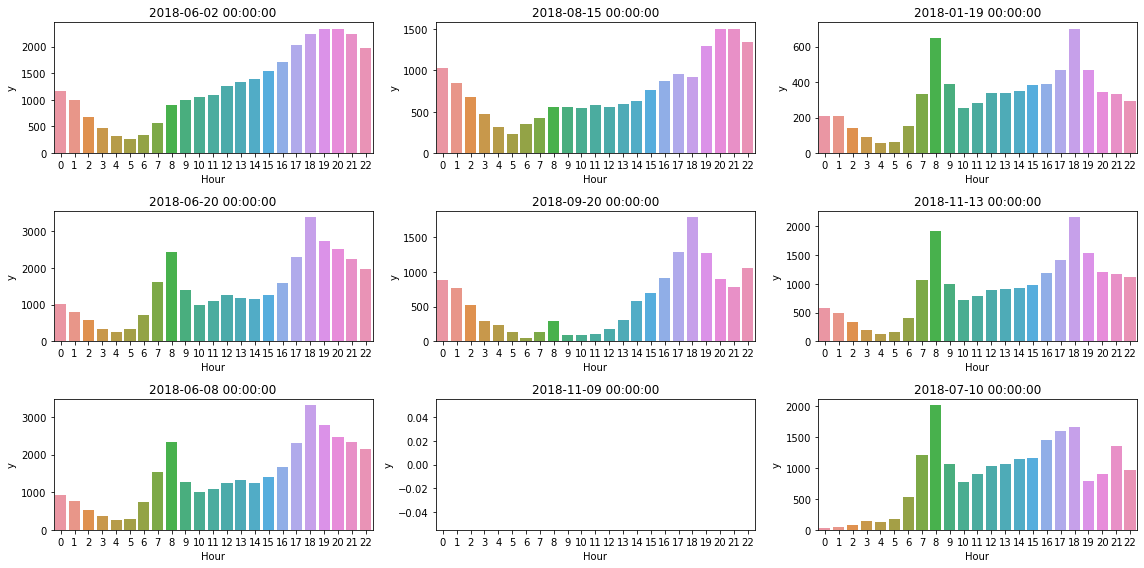

In [13]:
###--- will view by random choice of days
selection_set = [x for x in range(0,len(df),24)]
fig , axes = plt.subplots(3,3,figsize=(16,8))
for ax in axes.flatten():  
    i = np.random.choice(selection_set)
    sns.barplot(data=df.iloc[i:i+23,:],x='Hour',y='y',ax=ax)
    ax.set_title(str(df.loc[i,'Date']))
plt.tight_layout()
plt.show()    

<hr style="border:1px solid gray"> </hr>

### after some random choice of days it seems to be an obvious cycle (maybe intuitve)
* From start of the day ~7 am To ~18 pm captures most of the share compared to the start and in the end of each day 
    * also worth noting some days appear to have no bikes rented at all or up to half of the day with no rented bikes! we must check that latter.
* i will check if this cycle is the general for all the days we have.

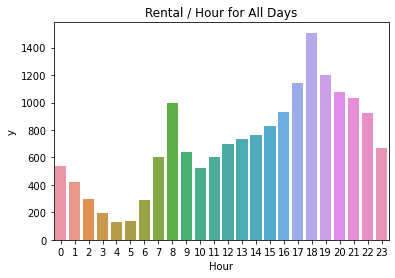

In [14]:
#--- group by hour .. for all the days we have!
df_hours = df.groupby('Hour',as_index =False)[['y']].mean()
sns.barplot(data=df_hours,x='Hour',y='y')
plt.title(str('Rental / Hour for All Days'))
plt.show()

#### this is almost the same pattern in each day .. can we generalize this finding? .. (to be investigated)

<hr style="border:2px solid gray"> </hr>

##### Next i want to see if we can get a new table representing the total rental bikes per day so we can see meaningful relations to other categorical variables like holiday or functional day .. etc

In [15]:
#-- i will use the mean as the average per the day as my indicator.
df_cat_day_y = df.groupby(['Date','Holiday','Functioning Day'],as_index =False)['y'].mean()

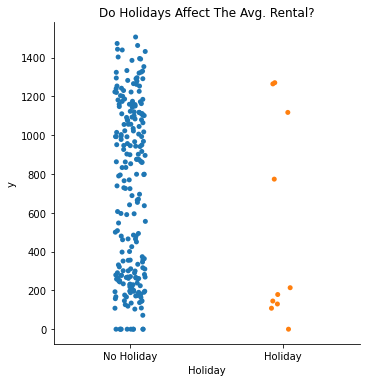

In [16]:
sns.catplot(data= df_cat_day_y,x='Holiday',y="y")
plt.title(str('Do Holidays Affect The Avg. Rental?'))
plt.show()

In [17]:
df_cat_day_y['Holiday'].value_counts()

No Holiday    231
Holiday        10
Name: Holiday, dtype: int64

#### The number of holidays / non holiday is very small fraction <=  4.15 % where it spans the full spectrum of the y variable (in a holiday the rental can be low ~ 300 , medium ~ 800 or high ~ 1400)
no clear correlation on the effect of the holiday on the y target due to its rare occurance in our data ~(10/241).

<hr style="border:0.5px solid gray"> </hr>

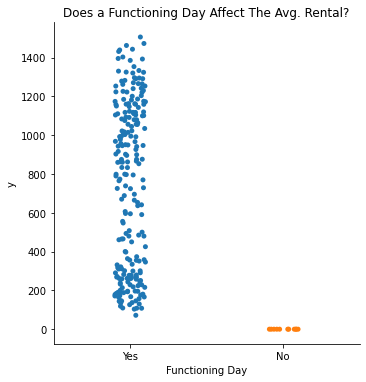

In [18]:
sns.catplot(data= df_cat_day_y,x='Functioning Day',y="y")
plt.title(str('Does a Functioning Day Affect The Avg. Rental?'))
plt.show()

In [19]:
#### Lets check their contribution
df_cat_day_y['Functioning Day'].value_counts()

Yes    230
No      11
Name: Functioning Day, dtype: int64

In [20]:
### are holidays overlap with non functioning days?
df_cat_day_y.loc[:,['Holiday','Functioning Day']].value_counts()

Holiday     Functioning Day
No Holiday  Yes                221
            No                  10
Holiday     Yes                  9
            No                   1
dtype: int64

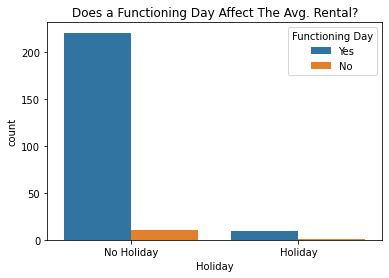

In [21]:
### are holidays overlap with non functioning days?
sns.countplot(data= df_cat_day_y,x='Holiday',hue='Functioning Day')
plt.title(str('Does a Functioning Day Affect The Avg. Rental?'))
plt.show()
## only 1 day is a holiday and a non-functioning day.
## the rest 10 are non holidays
#### same distribution of functional day exist either in holiday or a non holiday (overlapping between the two)

#### The number of non Functioning Day in data is also very small fraction <=  4.57 % where it has values only in the very low spectrum or zero)
in a non functioning day the rental of bikes decay and in our data set its zero on the avg.

### Lets Go for the Seasons!

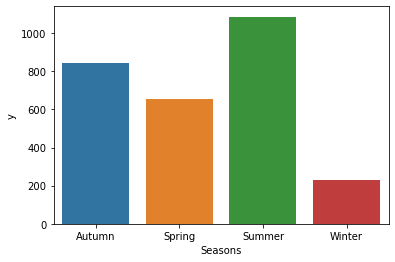

In [22]:
df_seasons_y = df.groupby(['Seasons'],as_index =False)['y'].mean()
sns.barplot(data = df_seasons_y,x='Seasons',y='y')
plt.show()

### the seasons correlation to the average bike rental 
if we start from winter - spring - summer - autumn we can see a cycle through the 4 seasons 
where the hot ones correlate ~Summer with higher bikes rental and the colder ~winter correlate with lower bikes rental.

### Overall summary of the categorical variables exploration and their contribution to the target Y
* First Impressions : 
    * Each Day -most likely- follow the same cycle.(we should investigate the ones that don't .. empty .. etc)
    * Rental Count varies with each seasons .. hot seasons has higher share.
    * Rental Count in non functional day decays to zero on average.
    * Rental count in Holiday doesn't forbid a high or medium count although it mainly contribute to low count.

## Lets go for Multivariate Exploration

* #### before that i will start encoding our categorical features 

In [23]:
df['Functioning Day'] = df['Functioning Day'].map({'Yes':1,'No':0})
df['Holiday'] = df['Holiday'].map({'Holiday':1,'No Holiday':0})
df['Seasons'] = df['Seasons'].map({'Autumn':0,'Winter':1,'Spring':2,'Summer':3})

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 5759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      5760 non-null   datetime64[ns]
 1   y                         5760 non-null   int64         
 2   Hour                      5760 non-null   int64         
 3   Temperature(C)            5760 non-null   float64       
 4   Humidity(%)               5760 non-null   int64         
 5   Wind speed (m/s)          5760 non-null   float64       
 6   Visibility (10m)          5760 non-null   int64         
 7   Dew point temperature(C)  5760 non-null   float64       
 8   Solar Radiation (MJ/m2)   5760 non-null   float64       
 9   Rainfall(mm)              5760 non-null   float64       
 10  Snowfall (cm)             5760 non-null   float64       
 11  Seasons                   5760 non-null   int64         
 12  Holiday             

In [25]:
corr = df.corr()

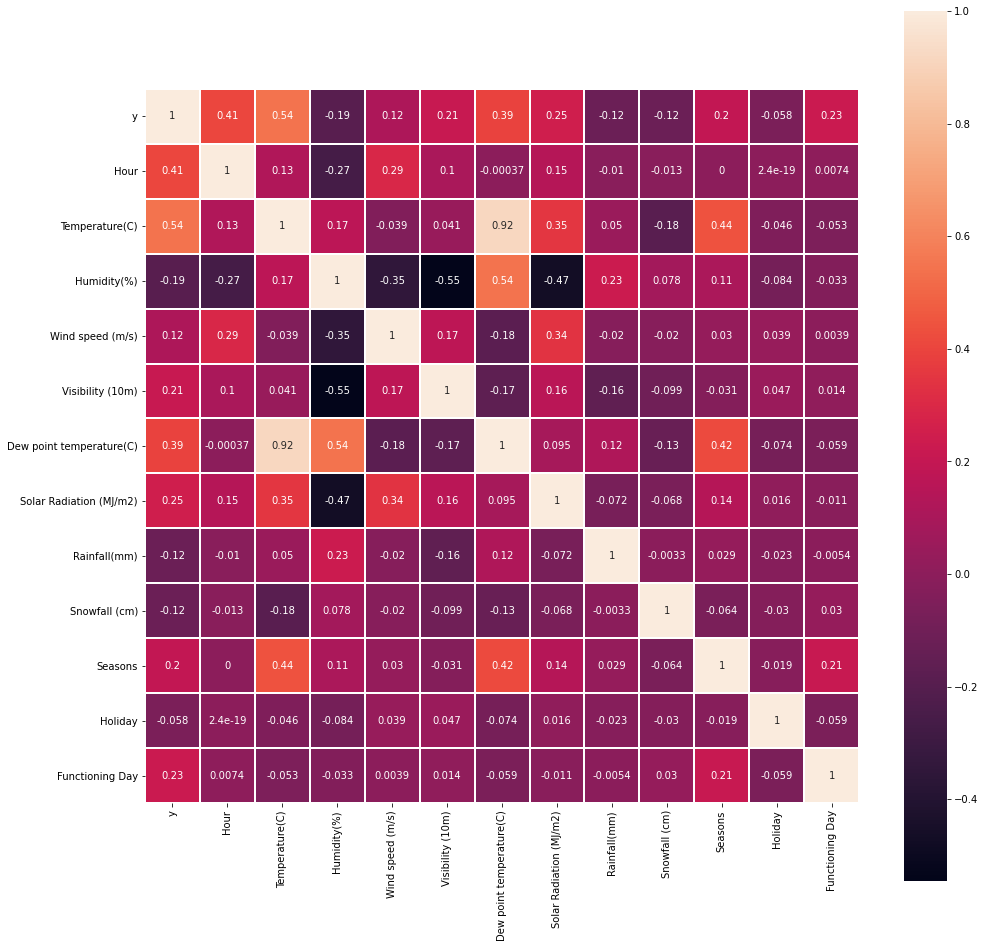

In [26]:
plt.figure(figsize=(16,16))
sns.heatmap(corr,annot=True,square=True,linewidths=1)
plt.show()

### correlations between the features:
* Tempreture & Dew Point Temperature ~ 0.92
* Tempreture & Seasons ~0.44

* Humidity & Visibility ~-.55
* Humidity & Dew Point Temperature ~+.54
* Humidity & Solar Radiation ~-.47

In [27]:
#---------- pair plots (multivariate exploration (distribution and relations))
#sns.pairplot(df)
plt.show()

### what i think will be helpful

* mainly there are things to be investigated like 
    - functional days
    - the current season
    - the current tempreture
    - the hourly cycle
    - investigate the effect of rainfall, snowfall , solar radiation , visibilty , wind speed

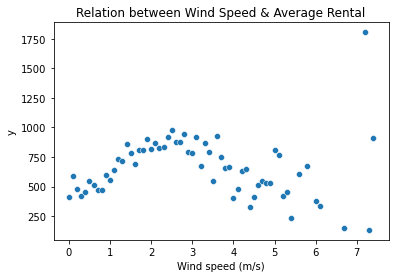

In [28]:
windspeed_rental = df.groupby('Wind speed (m/s)',as_index=False)['y'].mean()
sns.scatterplot(data = windspeed_rental,x='Wind speed (m/s)',y='y')
plt.title("Relation between Wind Speed & Average Rental")
plt.show()

* no strong correlation between wind speed and rental of bikes although there seem to be astronomically huge increase in bike rentals as the wind speed goes extremely high > 7 m/s.
* how is that right?

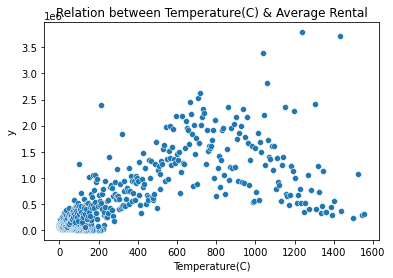

In [74]:
temperature_rental = df.groupby('Temperature(C)',as_index=False)['y'].mean()
temperature_rentalMOD = np.power(temperature_rental,2)
sns.scatterplot(data = temperature_rentalMOD,x='Temperature(C)',y='y')
plt.title("Relation between Temperature(C) & Average Rental")
plt.show()

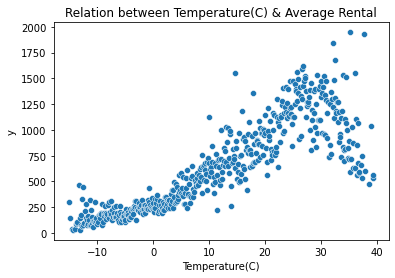

In [29]:
temperature_rental = df.groupby('Temperature(C)',as_index=False)['y'].mean()
sns.scatterplot(data = temperature_rental,x='Temperature(C)',y='y')
plt.title("Relation between Temperature(C) & Average Rental")
plt.show()

* strong correlation between the temperature and the average rental as to a certain threshold ~ 27 C 
* after that its noisy {27-40} , ranging from (~500 to ~2000) bike rentals
* some people can ride in a boiling weather !?

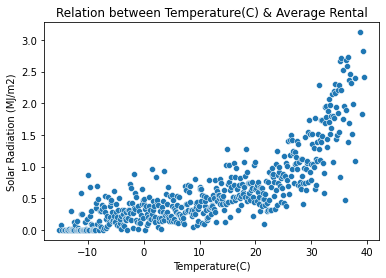

In [30]:
temperature_rental = df.groupby('Temperature(C)',as_index=False)['Solar Radiation (MJ/m2)'].mean()
sns.scatterplot(data = temperature_rental,x='Temperature(C)',y='Solar Radiation (MJ/m2)')
plt.title("Relation between Temperature(C) & Average Rental")
plt.show()

### lets see rain fall and snow fall effects

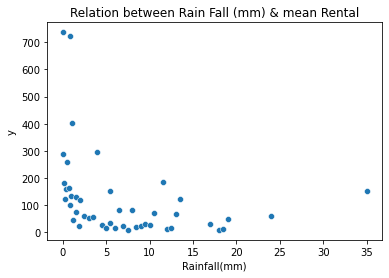

In [48]:
rain_fall_rental = df.groupby(['Rainfall(mm)'],as_index=False)['y'].mean()
sns.scatterplot(data = rain_fall_rental,x='Rainfall(mm)',y='y')
plt.title("Relation between Rain Fall (mm) & mean Rental")
plt.show()

* both distributions can be noisy but clearly there is a decay in the rental of bikes as the rain or snow fall.
-- Rainfall [numerical] can be encoded to 3 levels Rainy , lightRain  or no Rain {0,1,2}
-- snowfall [numerical] can be encoded to 2 levels snowfall or no snowfall {0,1}


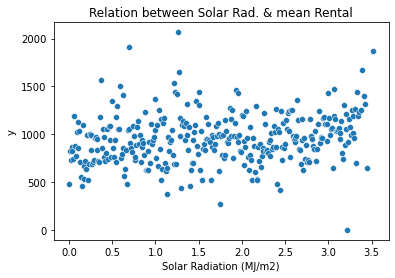

In [33]:
solar_rental = df.groupby(['Solar Radiation (MJ/m2)'],as_index=False)['y'].mean()
sns.scatterplot(data = solar_rental,x='Solar Radiation (MJ/m2)',y='y')
plt.title("Relation between Solar Rad. & mean Rental")
plt.show()

* no obvious correlation
-- i might discard this

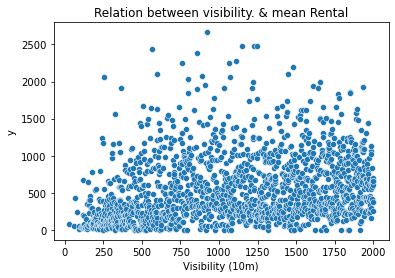

In [34]:
visibility_rental = df.groupby(['Visibility (10m)'],as_index=False)['y'].median()
sns.scatterplot(data = visibility_rental,x='Visibility (10m)',y='y')
plt.title("Relation between visibility. & mean Rental")
plt.show()

* no obvious correlation ... but as we get very close to zero there happens very sharp decay in rental ,, makes some sense
-- try to encode to normal and very low only?

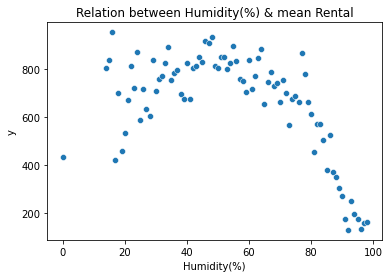

In [35]:
visibility_rental = df.groupby(['Humidity(%)'],as_index=False)['y'].mean()
sns.scatterplot(data = visibility_rental,x='Humidity(%)',y='y')
plt.title("Relation between Humidity(%) & mean Rental")
plt.show()

* we can say that after passing a certain threshold ~70% it starts decreasing rapidly

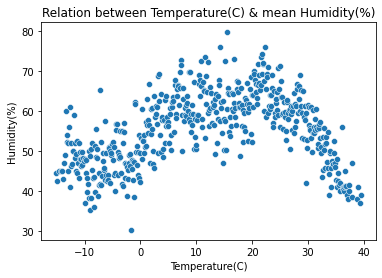

In [36]:
visibility_rental = df.groupby(['Temperature(C)'],as_index=False)['Humidity(%)'].mean()
sns.scatterplot(data = visibility_rental,x='Temperature(C)',y='Humidity(%)')
plt.title("Relation between Temperature(C) & mean Humidity(%)")
plt.show()

## Based on the above i have the following considerations

- A) The Hourly cycle has a good correlation. [7am-18pm has the bigger share]
- B) The Temperature has good corr. [high is good except > ~ 27]
- C) The Functional Day has good corr. [functional is good for target]
- D) The Seasons has good corr. [hot season is better]

-------------

- E) The Visibility may prove to be good. [if encoded to very_low visibility vs normal visibiliy].
- F) The RainFall/SnowFall may prove to be good. [if encoded to Snowing / Raining or not].
- G) The Humidity may have something to investigate. [if encoded as 0-80 % normal rentals, 80-100% show sharp decay in rentals]

---------------
- H) the Dew point temperature is strongly corr to Temperature will drop it.
- I) the Solar Radiation may be discarded .. i didn't see good relation.
- J) the holidays didn't prove decisive saying on our target. maybe discarded too.
